In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 1. Problem Statement :

Target variable : Premium



Independent variables :
1. Sr.no
2. Name
3. Age(yrs)
4. Gender
5. Height (cm)
6. Weight(kg)
7. Health Insurance cover

To find out the premium

# 2.Data Gathering

In [2]:
df = pd.read_excel('height_weight_data .xlsx')
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium
0,1,krushna,0.250000,male,61.4,6.4,500000,7015
1,2,pavan,0.333333,male,63.9,7.0,500000,7015
2,3,ketan,0.416667,male,65.9,7.5,500000,7015
3,4,akash,0.500000,male,67.6,7.9,500000,7015
4,5,syam,0.583333,male,69.2,8.3,500000,7015
...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,female,155.0,NaN,10000000,111340
1672,1673,mira,82.000000,female,155.0,65.0,10000000,111340
1673,1674,radha,83.000000,female,155.0,65.0,10000000,111340
1674,1675,lakshmi,84.000000,female,155.0,65.0,10000000,111340


# 3.EDA

1.Finding Null Values:

In [3]:
df.isna().sum()

,0
Sr.no,0
Name,0
Age(yrs),0
Gender,0
Height (cm),7
Weight(kg),6
Health Insurance cover,0
Premium,0


In [4]:
# we are having missing values in Height (cm), Weight(kg) columns

2.Finding Independent Variable which are in object form(String Form)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   object 
 4   Height (cm)             1669 non-null   float64
 5   Weight(kg)              1670 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 104.9+ KB


In [7]:
df.describe()

,Sr.no,Age(yrs),Height (cm),Weight(kg),Health Insurance cover,Premium
count,1676.000000,1676.000000,1669.000000,1670.000000,1.676000e+03,1676.000000
mean,838.500000,39.296241,146.506153,55.261635,3.414976e+06,30299.919451
std,483.963842,26.338582,31.425153,22.966762,3.170480e+06,25308.839018
min,1.000000,0.250000,56.000000,4.800000,5.000000e+05,7015.000000
25%,419.750000,16.000000,153.800000,47.000000,1.000000e+06,14100.000000
50%,838.500000,39.000000,155.000000,65.000000,2.000000e+06,18225.000000
75%,1257.250000,62.000000,165.000000,68.000000,5.000000e+06,41410.000000
max,1676.000000,85.000000,177.000000,88.000000,1.000000e+07,111340.000000


In [8]:
# We need to encode column df['Gender'].

In [9]:
# We need to drop columns like Sr. no and Name (as they are having all unique values and not so helpful in building models)

df['Health Insurance Cover']

In [10]:
df['Health Insurance cover'].unique()

array([  500000,   750000,  1000000,  1500000,  2000000,  2500000,
        5000000,  7500000, 10000000])

In [11]:
# We do not need to encode column df['Health Insurance cover'].

3.Detecting Outliers

df['Age(yrs)']

In [12]:
df['Age(yrs)']

,Age(yrs)
0,0.250000
1,0.333333
2,0.416667
3,0.500000
4,0.583333
...,...
1671,81.000000
1672,82.000000
1673,83.000000
1674,84.000000


In [13]:
q1 = df['Age(yrs)'].quantile(0.25)
q3 = df['Age(yrs)'].quantile(0.75)

In [14]:
iqr = q3 - q1
iqr

np.float64(46.0)

In [15]:
upper_tail = q3 + 1.5*iqr
lower_tail = q1 - 1.5*iqr

upper_tail, lower_tail

(np.float64(131.0), np.float64(-53.0))

In [16]:
# age (yrs) column have no any outliers as there are no any values/data crossing these upper_tail and lower_tail limit.

<Axes: ylabel='Age(yrs)'>

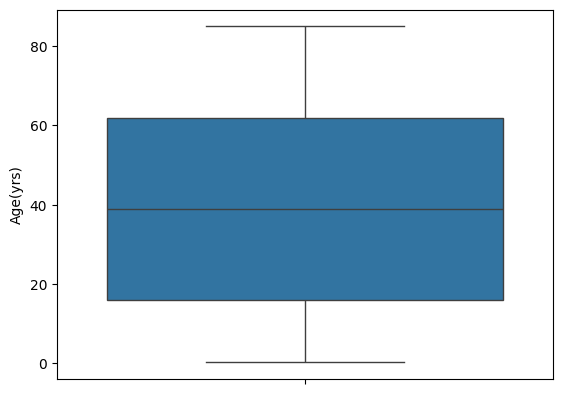

In [17]:
sns.boxplot(df['Age(yrs)'])

In [18]:
# Age (yrs) column doesn't have any outliers.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   object 
 4   Height (cm)             1669 non-null   float64
 5   Weight(kg)              1670 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 104.9+ KB


df['Height (cm)']

<Axes: ylabel='Height (cm)'>

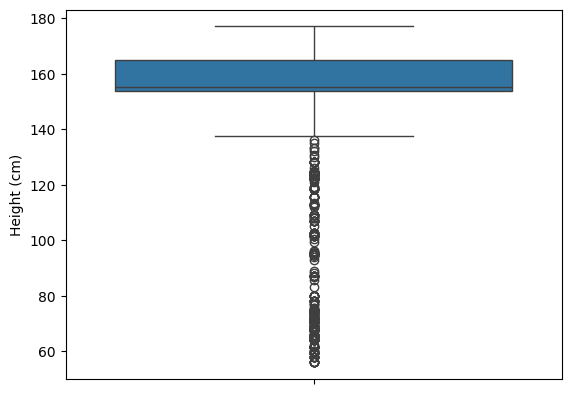

In [20]:
sns.boxplot(df['Height (cm)'])

<Axes: xlabel='Height (cm)', ylabel='Density'>

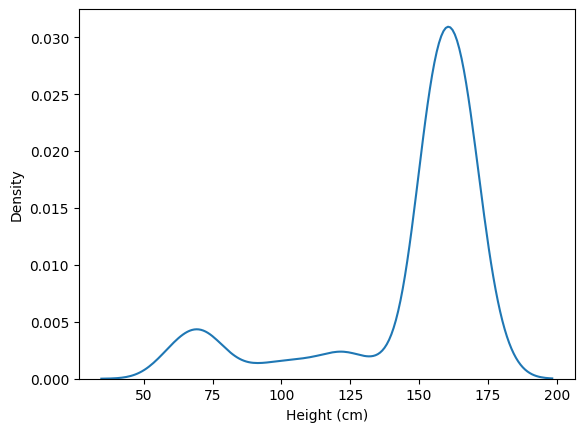

In [21]:
sns.kdeplot(df['Height (cm)'])

In [22]:
# column df['Height (cm)'] is having outliers. We need to handle these outliers in feature engineering.

df['Weight(kg)']

<Axes: ylabel='Weight(kg)'>

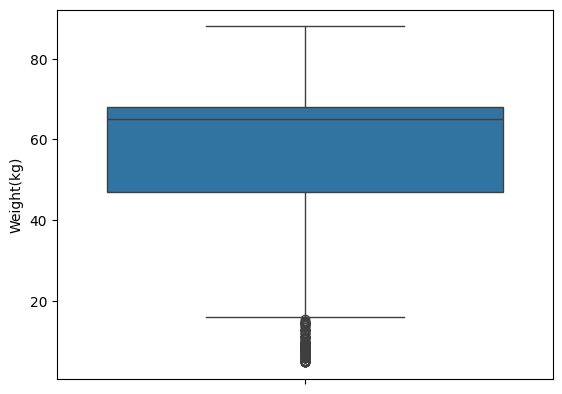

In [23]:
sns.boxplot(df['Weight(kg)'])

In [24]:
# column df['Weight (kg)'] is having outliers. We need to handle these outliers in feature engineering.

In [25]:
# We need to construct(create) new feature from existing features (df['Height (cm)'] & df['Weight (kg)']) and that will be named as BMI (Body Mass Index) new feature.

# 4.Feature Engineering

In [27]:
# Here we are fill the missing values

In [28]:
df.isna().sum()

,0
Sr.no,0
Name,0
Age(yrs),0
Gender,0
Height (cm),7
Weight(kg),6
Health Insurance cover,0
Premium,0


In [29]:
df['Height (cm)'].fillna(df['Height (cm)'].median(), inplace=True)

/tmp/ipython-input-2009318698.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height (cm)'].fillna(df['Height (cm)'].median(), inplace=True)


In [30]:
df['Weight(kg)'].fillna(df['Weight(kg)'].median(), inplace=True)

/tmp/ipython-input-3248490896.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight(kg)'].fillna(df['Weight(kg)'].median(), inplace=True)


In [31]:
df.isna().sum()

,0
Sr.no,0
Name,0
Age(yrs),0
Gender,0
Height (cm),0
Weight(kg),0
Health Insurance cover,0
Premium,0


In [32]:
# Performing encoding on columns df['Gender']

In [33]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [34]:
df['Gender'].replace({'male':0, 'female':1}, inplace=True)

/tmp/ipython-input-2855755960.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'male':0, 'female':1}, inplace=True)
/tmp/ipython-input-2855755960.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].replace({'male':0, 'female':1}, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   int64  
 4   Height (cm)             1676 non-null   float64
 5   Weight(kg)              1676 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 104.9+ KB


In [36]:
# Constructing new feature called 'BMI (Body Mass Index)' using features df['Height (cm)'] and df['Weight(kg)']

In [40]:
df['Height (cm)']/100

,Height (cm)
0,0.614
1,0.639
2,0.659
3,0.676
4,0.692
...,...
1671,1.550
1672,1.550
1673,1.550
1674,1.550


In [41]:
df['BMI'] = df['Weight(kg)'] / ((df['Height (cm)']/100)**2)

In [42]:
df

,Sr.no,Name,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium,BMI
0,1,krushna,0.250000,0,61.4,6.4,500000,7015,16.976307
1,2,pavan,0.333333,0,63.9,7.0,500000,7015,17.143375
2,3,ketan,0.416667,0,65.9,7.5,500000,7015,17.269924
3,4,akash,0.500000,0,67.6,7.9,500000,7015,17.287560
4,5,syam,0.583333,0,69.2,8.3,500000,7015,17.332687
...,...,...,...,...,...,...,...,...,...
1671,1672,kiran,81.000000,1,155.0,65.0,10000000,111340,27.055151
1672,1673,mira,82.000000,1,155.0,65.0,10000000,111340,27.055151
1673,1674,radha,83.000000,1,155.0,65.0,10000000,111340,27.055151
1674,1675,lakshmi,84.000000,1,155.0,65.0,10000000,111340,27.055151


<Axes: ylabel='BMI'>

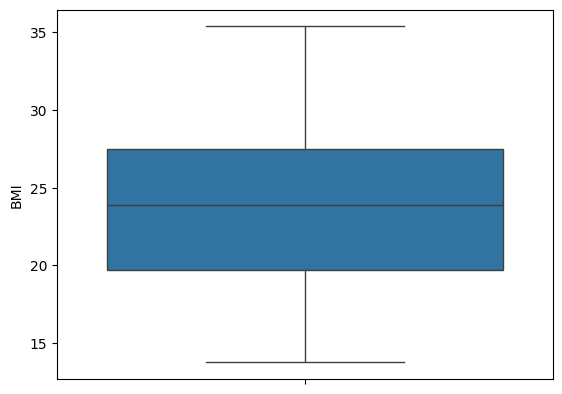

In [44]:
sns.boxplot(df['BMI'])

In [45]:
df.describe()

,Sr.no,Age(yrs),Gender,Height (cm),Weight(kg),Health Insurance cover,Premium,BMI
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1.676000e+03,1676.000000,1676.000000
mean,838.500000,39.296241,0.504773,146.541629,55.296498,3.414976e+06,30299.919451,23.548111
std,483.963842,26.338582,0.500126,31.364207,22.932972,3.170480e+06,25308.839018,4.857805
min,1.000000,0.250000,0.000000,56.000000,4.800000,5.000000e+05,7015.000000,13.770214
25%,419.750000,16.000000,0.000000,153.800000,47.000000,1.000000e+06,14100.000000,19.698557
50%,838.500000,39.000000,1.000000,155.000000,65.000000,2.000000e+06,18225.000000,23.875115
75%,1257.250000,62.000000,1.000000,165.000000,68.000000,5.000000e+06,41410.000000,27.482699
max,1676.000000,85.000000,1.000000,177.000000,88.000000,1.000000e+07,111340.000000,35.379813


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sr.no                   1676 non-null   int64  
 1   Name                    1676 non-null   object 
 2   Age(yrs)                1676 non-null   float64
 3   Gender                  1676 non-null   int64  
 4   Height (cm)             1676 non-null   float64
 5   Weight(kg)              1676 non-null   float64
 6   Health Insurance cover  1676 non-null   int64  
 7   Premium                 1676 non-null   int64  
 8   BMI                     1676 non-null   float64
dtypes: float64(4), int64(4), object(1)
memory usage: 118.0+ KB


# 5.Feature Selection

In [47]:
# Dropping unnecessary features in this step

In [48]:
df.drop(['Sr.no', 'Name', 'Height (cm)', 'Weight(kg)'], axis=1, inplace=True)

# 6.Model Building

In [50]:
x = df.drop('Premium', axis=1)
y = df['Premium']


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [53]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [54]:
# Testing Accuracy :

y_pred = rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :",mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error :",mae)

r2 = r2_score(y_test, y_pred)
print("R2 Score :",r2)

Mean Squared Error : 3044931.080596421
Mean Absolute Error : 272.65347912524834
R2 Score : 0.9950865859198784


In [55]:
# Training Accuracy :

y_pred_train = rf_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error :",mse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)

r2 = r2_score(y_train, y_pred_train)
print("R2 Score :",r2)

Mean Squared Error : 869805.3884271099
Mean Absolute Error : 138.20861040068192
R2 Score : 0.9986596066802921


**Testing Data**

In [56]:
age = 45
gender = 'male'
height = 155
weight = 65
health_insurance_cover = 2500000

In [57]:
def gender_encoder(gen):
  if gen == 'male':
    return 0
  else:
    return 1

In [58]:
gender_encoder(gender)

0

In [59]:
def BMI(h, w):
  bmi = w/((h/100)**2)
  return bmi

In [60]:
BMI(height, weight)

27.055150884495315

In [61]:
x.columns

Index(['Age(yrs)', 'Gender', 'Health Insurance cover', 'BMI'], dtype='object')

In [62]:
x_data = pd.DataFrame({'Age(yrs)':[age], 'Gender':[gender_encoder(gender)], 'Health Insurance cover':[500000], 'BMI':[BMI(height, weight)]})
x_data

,Age(yrs),Gender,Health Insurance cover,BMI
0,45,0,500000,27.055151


In [63]:
rf_model.predict(x_data)

array([8177.5])

In [64]:
import pickle

In [65]:
file = open('rf_model.pkl', 'wb')
pickle.dump(rf_model, file)
file.close()

In [66]:
f = open('column_name.obj', 'wb')
pickle.dump(x.columns, f)
f.close()

  adding: .config/ (stored 0%)
  adding: .config/.last_opt_in_prompt.yaml (stored 0%)
  adding: .config/configurations/ (stored 0%)
  adding: .config/configurations/config_default (deflated 15%)
  adding: .config/gce (stored 0%)
  adding: .config/.last_survey_prompt.yaml (stored 0%)
  adding: .config/default_configs.db (deflated 98%)
  adding: .config/active_config (stored 0%)
  adding: .config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: .config/.last_update_check.json (deflated 22%)
  adding: .config/config_sentinel (stored 0%)
  adding: .config/logs/ (stored 0%)
  adding: .config/logs/2026.01.16/ (stored 0%)
  adding: .config/logs/2026.01.16/14.24.03.314209.log (deflated 58%)
  adding: .config/logs/2026.01.16/14.24.18.954466.log (deflated 58%)
  adding: .config/logs/2026.01.16/14.24.29.392089.log (deflated 56%)
  adding: .config/logs/2026.01.16/14.24.28.646070.log (deflated 57%)
  adding: .config/logs/2026.01.16/14.23.31.981136.log (deflate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>